# ADS654 - Covid Classification

### Kyle Lacson and Esther Laub

Training a CNN on covid and non-covid infected lung images. The goal here is to develop a working CNN that is able execute under an hour (using google colabs GPU or a single GPU - M1 Pro Chip).

### 1.1 Importing libraries and packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

# from google.colab import drive
import glob
import os,shutil
import warnings
warnings.filterwarnings('ignore')

### 1.2 Mounting Google Drive

In [2]:
# drive.mount('/content/gDrive')

In [3]:
### setting the base directory
main_dir = os.getcwd()

In [4]:
os.chdir(r'C:\Users')

In [5]:
dirs = [] # give this about a min
for dir,root,files in os.walk(os.getcwd()):
    if 'Covid_Images' in dir:
        dirs.append(dir)
        if len(dirs) >= 3:
            break
        else:
            continue
    else:
        continue

In [6]:
for i in dirs:
    if i[-len('Covid_Images'):] == 'Covid_Images':
        image_dir = i
    else:
        continue
image_dir

'C:\\Users\\kblac\\Downloads\\Covid_Images'

In [7]:
os.chdir(main_dir)

In [8]:
for dir, root, files in os.walk(main_dir):
  print(root)

['archive', 'Kaggle']
['.ipynb_checkpoints', 'Test', 'Train']
[]
['Covid', 'Non_Covid']
[]
[]
['Covid', 'Non_Covid']
[]
[]
['playground-series-s3e11', 'playground-series-s3e9']
[]
[]


In [9]:
# image_dir = os.path.join(main_dir,'Covid_Images') # not needed once images are in main directory
train_test_dir = os.path.join(main_dir,'archive')

### 1.3 Setting up proper directories for training and test datasets

**Make new directory for training and test images**

In [10]:
def make_new_dir():
  os.chdir(train_test_dir) # change working directory
  if os.path.exists(os.path.abspath('Train')) & os.path.exists(os.path.abspath('Test')):
    pass
  elif (os.path.exists(os.path.abspath('Train')) == True) & (os.path.exists(os.path.abspath('Test')) == False):
    os.mkdir('Test')
  elif (os.path.exists(os.path.abspath('Train')) == False) & (os.path.exists(os.path.abspath('Test')) == True):
    os.mkdir('Train')
  else:
    os.mkdir('Train')
    os.mkdir('Test')

In [11]:
# make_new_dir()

In [12]:
train_dir = os.path.abspath('Train')
test_dir = os.path.abspath('Test')

**Make subdirectories in train and test directories**

In [13]:
def make_train_subdirs():
  os.chdir(train_dir)
  os.mkdir('Covid')
  os.mkdir('Non_Covid')

def make_test_subdirs():
  os.chdir(test_dir)
  os.mkdir('Covid')
  os.mkdir('Non_Covid')

In [14]:
# make_train_subdirs()
# make_test_subdirs()

In [15]:
os.chdir(main_dir)# returning to project directory

**Image directory for covid and non-covid images**

In [16]:
covid_dir = os.path.join(image_dir,'COVID') 
noncovid_dir = os.path.join(image_dir,'non-COVID')

**Number of images for covid and non-covid**

In [17]:
print(f'Number of covid images: {len(os.listdir(covid_dir))} \nNumber of non-covid images: {len(os.listdir(noncovid_dir))}')

Number of covid images: 1252 
Number of non-covid images: 1229


**Need transfer images into training and testing datasets, need to figure out which dataset is missing any images within the range.**

In [18]:
# framework for filename - "Covid (###).png"
def covid_file_check():
  true = 0
  false = 0
  missing_covid_files = []
  for i in range(len(os.listdir(covid_dir))+1):
    if f'Covid ({i}).png' in os.listdir(covid_dir):
      true += 1
    else:
      false +=1
      print(f'Image {i}')
      missing_covid_files.append(i)
  print(f'Total covid images: {(true+false)-1}')
  return missing_covid_files

missing_covid_files = covid_file_check()

Image 0
Total covid images: 1252


In [19]:
# framework for filename - "Non-Covid (###).png"
def noncovid_file_check():
  true = 0
  false = 0
  missing_noncovid_files = []
  for i in range(len(os.listdir(noncovid_dir))+1):
    if f'Non-Covid ({i}).png' in os.listdir(noncovid_dir):
      true += 1
    else:
      false += 1
      print(f'Image {i}')
      missing_noncovid_files.append(i)
  print(f'Total noncovid images: {(true+false)-1}')
  return missing_noncovid_files

missing_noncovid_files = noncovid_file_check()

Image 0
Image 151
Total noncovid images: 1229


In [20]:
os.chdir(main_dir) # changing back to wd
os.getcwd()

'd:\\Documents\\Coding_Projects_GitHub'

### 1.4 Splitting the training and testing data set

**Plan is to use 20% for test data set -> will take 20% from covid datasets**

In [21]:
covid_dir

'C:\\Users\\kblac\\Downloads\\Covid_Images\\COVID'

In [22]:
print(f'20% of covid images that will be used for testing: {round(len(os.listdir(covid_dir))*0.20,0)}')
len(os.listdir(covid_dir)) - 250 # training images

20% of covid images that will be used for testing: 250.0


1002

**There are no missing covid files within the full range of covid images**

In [23]:
missing_covid_files # no missing images in range

[0]

In [24]:
### Training covid images list
def covid_training_img_list(): # no restrictions
  covid_train_imgs_list = []
  for ix,i in enumerate(range(1002+1)): 
    if ix == 0:
      continue
    else:
      src_fname = f'Covid ({i}).png'
      covid_train_imgs_list.append(src_fname)
  return covid_train_imgs_list

def covid_test_img_list():
  covid_test_imgs_list = []
  for ix,i in enumerate(range(1003,1253)):
    src_fname = f'Covid ({i}).png'
    covid_test_imgs_list.append(src_fname)
  return covid_test_imgs_list

covid_train_imgs_list = covid_training_img_list()
covid_test_imgs_list = covid_test_img_list()

**Plan is to use 20% for test data set -> will take 20% from non-covid datasets**

In [25]:
noncovid_dir

'C:\\Users\\kblac\\Downloads\\Covid_Images\\non-COVID'

In [26]:
print(f'20% of covid images that will be used for testing: {round(len(os.listdir(noncovid_dir))*0.20,0)}')
len(os.listdir(noncovid_dir)) - 246 # training images

20% of covid images that will be used for testing: 246.0


983

**There is one missing covid file image within the full range of covid images**

In [27]:
missing_noncovid_files # one missing image in range

[0, 151]

In [28]:
def noncovid_training_img_list():
  noncovid_train_imgs_list = []
  for ix,i in enumerate(range(983+1)):
    if i in missing_noncovid_files:
      continue
    else:
      src_fname = f'Non-Covid ({i}).png'
      noncovid_train_imgs_list.append(src_fname)
  return noncovid_train_imgs_list

def noncovid_testing_img_list():
  noncovid_test_imgs_list = []
  for ix,i in enumerate(range(984,1231)): # range should be from image 984 to 1229
    src_fname = f'Non-Covid ({i}).png'
    noncovid_test_imgs_list.append(src_fname)
  return noncovid_test_imgs_list

noncovid_train_imgs_list = noncovid_training_img_list()
noncovid_test_imgs_list = noncovid_testing_img_list()

**Checking that the directories contain all image filenamese**

In [29]:
print(f'Total covid images: {len(covid_train_imgs_list) + len(covid_test_imgs_list)}')
print(f'Total noncovid images: {len(noncovid_train_imgs_list) + len(noncovid_test_imgs_list)}')

Total covid images: 1252
Total noncovid images: 1229


In [30]:
noncovid_train_imgs_list[-5:], noncovid_test_imgs_list[:5]

(['Non-Covid (979).png',
  'Non-Covid (980).png',
  'Non-Covid (981).png',
  'Non-Covid (982).png',
  'Non-Covid (983).png'],
 ['Non-Covid (984).png',
  'Non-Covid (985).png',
  'Non-Covid (986).png',
  'Non-Covid (987).png',
  'Non-Covid (988).png'])

In [31]:
# checking to what the last file names are for noncovid tests...
def digit_finder(list_input):
  number = []
  for i in list_input:
    if i.isdigit():
      number.append(i)
    else:
      continue
  return int(''.join(number))

non_list = []  
for i in os.listdir(noncovid_dir):
  num = digit_finder(i)
  non_list.append(num)

In [32]:
non_list.sort()
non_list[-5:]

[1226, 1227, 1228, 1229, 1230]

*Notes:* Generating list of names was successfully created. Can now use the shutil package to copy over images into their respective directories...

### 1.5 Moving images into subdirectories

In [33]:
### from covid_dir -> train_dir & test_dir 
### from noncovid_dir -> train_dir & test_dir
os.chdir(train_test_dir)
os.getcwd() # changing working directory

'd:\\Documents\\Coding_Projects_GitHub\\archive'

In [34]:
train_dir = os.path.join(train_test_dir,'Train') # model training directory (archive)
test_dir = os.path.join(train_test_dir,'Test') # model testing directory (archive)

In [35]:
### covid_train_imgs_list, covid_test_imgs_list
### noncovid_train_imgs_list, noncovid_train_imgs_list
len(covid_train_imgs_list) + len(covid_test_imgs_list), len(noncovid_train_imgs_list) + len(noncovid_test_imgs_list)

(1252, 1229)

**Covid Image Transfer**

In [36]:
train_dir, test_dir

('d:\\Documents\\Coding_Projects_GitHub\\archive\\Train',
 'd:\\Documents\\Coding_Projects_GitHub\\archive\\Test')

In [37]:
# covid train
def covid_train_transfer():
  for ix,i in enumerate(covid_train_imgs_list): # covid training images
    src = os.path.join(covid_dir,i)
    dst = os.path.join(train_dir,'Covid',i) # covid subdir in train
    shutil.copy(src,dst)

# covid test
def covid_test_transfer():
  for ix,i in enumerate(covid_test_imgs_list): # covid test images
    src = os.path.join(covid_dir,i)
    dst = os.path.join(test_dir,'Covid',i) # covid subdir in test
    shutil.copy(src,dst)

In [38]:
# covid_train_transfer()
# covid_test_transfer() # ~ 10 min runtime

**Noncovid Image Transfer**

In [39]:
# noncovid train
def noncovid_train_transfer():
  for ix,i in enumerate(noncovid_train_imgs_list): # covid training images
    src = os.path.join(noncovid_dir,i)
    dst = os.path.join(train_dir,'Non_Covid',i) # covid subdir in train
    shutil.copy(src,dst)

# noncovid test
def noncovid_test_transfer():
  for ix,i in enumerate(noncovid_test_imgs_list): # covid test images
    src = os.path.join(noncovid_dir,i)
    dst = os.path.join(test_dir,'Non_Covid',i) # covid subdir in test
    shutil.copy(src,dst)

In [40]:
# noncovid_train_transfer() ~ 8 mins runtime

In [41]:
# noncovid_test_transfer() ~ 2 mins runtime

In [42]:
for dir,root,files in os.walk(train_dir):
  print(f'Directory Name: {dir}  |   Number of images: {len(files)}')

Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Train  |   Number of images: 0
Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Train\Covid  |   Number of images: 1002
Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Train\Non_Covid  |   Number of images: 982


In [43]:
for dir,root,files in os.walk(test_dir):
  print(f'Directory Name: {dir}   |   Number of images: {len(files)}')

Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Test   |   Number of images: 0
Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Test\Covid   |   Number of images: 250
Directory Name: d:\Documents\Coding_Projects_GitHub\archive\Test\Non_Covid   |   Number of images: 247


In [44]:
1002+250,982+247 # All images has been transferred

(1252, 1229)

### 2.1 Importing Images from directory 

In [45]:
train_dir

'd:\\Documents\\Coding_Projects_GitHub\\archive\\Train'

**Train images** 

With validation split

In [46]:
train_batch = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir, # not sure what input is needed for this attribute
    seed = 42,
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training'
)

Found 1984 files belonging to 2 classes.
Using 1588 files for training.


**Validation images**

In [47]:
validation_batch = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir, # not sure what input is needed for this attribute
    seed = 42,
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation'
)

Found 1984 files belonging to 2 classes.
Using 396 files for validation.


**Test images**

In [48]:
test_dir

'd:\\Documents\\Coding_Projects_GitHub\\archive\\Test'

In [49]:
test_batch = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    seed = 42
)

Found 497 files belonging to 2 classes.


In [50]:
train_batch.class_names, test_batch.class_names

(['Covid', 'Non_Covid'], ['Covid', 'Non_Covid'])

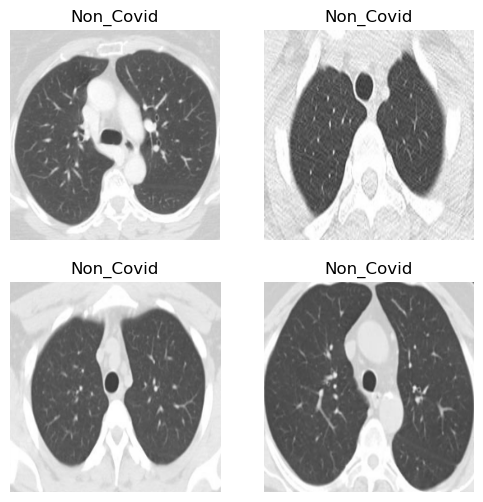

In [51]:
fig = plt.figure(figsize = (6,6))
for imgs,labels in train_batch.take(1):
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(imgs[i].numpy().astype('int'))
    plt.title(train_batch.class_names[labels[i]])
    plt.axis('off')

### 2.2 Preparing the training images and label iterator

In [52]:
train_images,train_labels = next(iter(train_batch))

### 3.1 Build CNN Model

In [53]:
input_layer = tf.keras.Input(shape = train_images.shape[1:], name = 'input_layer')
rescale_layer = tf.keras.layers.Rescaling(scale = 1./255, name = 'rescaling_layer')(input_layer) ### maybe add a padding layer?
conv_layerb1_1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'conv2d_layerb1_1')(rescale_layer) 
pool_layerb1_1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2, name = 'max_pool_layerb1_1')(conv_layerb1_1)
batch_norm_layer1 = tf.keras.layers.BatchNormalization(name = 'batch_norm_layer1')(pool_layerb1_1)
flatten_layer = tf.keras.layers.Flatten(name = 'flatten_layer')(batch_norm_layer1)
dense_layer1 = tf.keras.layers.Dense(units = 16, activation = 'relu', name = 'dense_layer2')(flatten_layer)
output_layer = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'output_layer')(dense_layer1)

In [54]:
cnn_model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = 'kl_el_cnn_modelv1')

In [55]:
cnn_model.summary()

Model: "kl_el_cnn_modelv1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_layer (Rescaling)  (None, 256, 256, 3)      0         
                                                                 
 conv2d_layerb1_1 (Conv2D)   (None, 256, 256, 32)      896       
                                                                 
 max_pool_layerb1_1 (MaxPool  (None, 128, 128, 32)     0         
 ing2D)                                                          
                                                                 
 batch_norm_layer1 (BatchNor  (None, 128, 128, 32)     128       
 malization)                                                     
                                                                 
 flatten_layer (Flatten)     (None, 524288)      

*Notes:* Can add data augmentation, dropout layers, or batch normalization to combat overfitting

- Will need to flatten, dense layer, and the output should be a single output using some kind of classificaiton activation function -> sigmoid should be fine

- Adding more padding layers should increase overall model accuracy

### 3.2 Add compiler (addition of loss and optimizer functions)

In [56]:
cnn_model.compile(
  optimizer = 'SGD',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)

### 3.3 Fitting Model

In [57]:
epoch = 100

model_fit = cnn_model.fit(
  x = train_batch,
  epochs = epoch,
  validation_data = validation_batch
) 

Epoch 1/100
50/50 [==============================] - 6s 56ms/step - loss: 2.2991 - accuracy: 0.5466 - val_loss: 0.9526 - val_accuracy: 0.4545
Epoch 2/100
50/50 [==============================] - 3s 51ms/step - loss: 0.6243 - accuracy: 0.6518 - val_loss: 1.2201 - val_accuracy: 0.4571
Epoch 3/100
50/50 [==============================] - 3s 52ms/step - loss: 0.6128 - accuracy: 0.6593 - val_loss: 0.6493 - val_accuracy: 0.4621
Epoch 4/100
50/50 [==============================] - 3s 50ms/step - loss: 0.5918 - accuracy: 0.6952 - val_loss: 0.6722 - val_accuracy: 0.4697
Epoch 5/100
50/50 [==============================] - 3s 55ms/step - loss: 0.5576 - accuracy: 0.7418 - val_loss: 0.6079 - val_accuracy: 0.7096
Epoch 6/100
50/50 [==============================] - 3s 53ms/step - loss: 0.5340 - accuracy: 0.7374 - val_loss: 0.5433 - val_accuracy: 0.7727
Epoch 7/100
50/50 [==============================] - 3s 52ms/step - loss: 0.5083 - accuracy: 0.7746 - val_loss: 0.5610 - val_accuracy: 0.7753
Epoch 

### 3.4 Results from fitting model

**Taken from** https://www.tensorflow.org/tutorials/images/classification

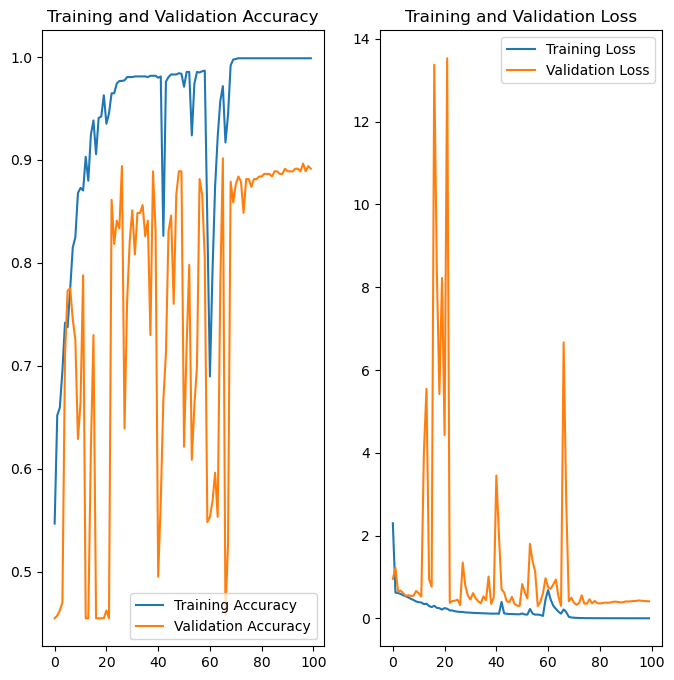

In [58]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 3.5 Evaluating Test Set

In [59]:
final_predictions = cnn_model.evaluate(
    x = test_batch
)

16/16 [==============================] - 1s 25ms/step - loss: 1.1892 - accuracy: 0.7525


In [60]:
final_predictions[1] # final score on test set

0.7525150775909424

### 4.1 Pre-trained model

**Importing the ResNet101V2 function**

In [61]:
train_images.shape

TensorShape([32, 256, 256, 3])

In [62]:
resnet101v2_model = tf.keras.applications.ResNet101V2(
    include_top = False,
    weights = 'imagenet',
    input_shape = train_images.shape[1:],
    pooling = 'max' # can play around with this if it helps speed up the testing evaluation
)

In [63]:
# freezing trainable weights/parameters
resnet101v2_model.trainable = False

In [64]:
# building the model

input_layer = tf.keras.Input(shape = train_images.shape[1:], name = 'input_layer1')
preprocess_layer = tf.keras.applications.mobilenet.preprocess_input(input_layer)
pretrained_model = resnet101v2_model(preprocess_layer)
output_layer = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputlayer1')(pretrained_model)

In [65]:
# defining the model
pre_trained_model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = 'resnet101v2_pretrained')

In [66]:
# compile the model 
pre_trained_model.compile(optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [67]:
pre_trained_loss, pre_trained_accuracy = pre_trained_model.evaluate(validation_batch)

13/13 [==============================] - 7s 233ms/step - loss: 2.9395 - accuracy: 0.5505


In [68]:
# training the pre_trained_model on dataset
init_epoch = 50

pre_trained = pre_trained_model.fit(
    x = train_batch,
    epochs = init_epoch,
    validation_data = validation_batch
)

Epoch 1/50
50/50 [==============================] - 18s 244ms/step - loss: 45.3205 - accuracy: 0.5686 - val_loss: 7.7507 - val_accuracy: 0.8081
Epoch 2/50
50/50 [==============================] - 12s 228ms/step - loss: 16.0099 - accuracy: 0.7311 - val_loss: 67.2275 - val_accuracy: 0.4545
Epoch 3/50
50/50 [==============================] - 11s 219ms/step - loss: 16.5060 - accuracy: 0.7437 - val_loss: 5.2328 - val_accuracy: 0.8662
Epoch 4/50
50/50 [==============================] - 12s 228ms/step - loss: 11.6282 - accuracy: 0.7834 - val_loss: 19.3159 - val_accuracy: 0.7045
Epoch 5/50
50/50 [==============================] - 12s 229ms/step - loss: 12.8912 - accuracy: 0.7727 - val_loss: 11.2644 - val_accuracy: 0.7828
Epoch 6/50
50/50 [==============================] - 11s 217ms/step - loss: 6.3124 - accuracy: 0.8545 - val_loss: 4.5736 - val_accuracy: 0.8308
Epoch 7/50
50/50 [==============================] - 11s 211ms/step - loss: 4.5424 - accuracy: 0.8715 - val_loss: 3.3762 - val_accuracy

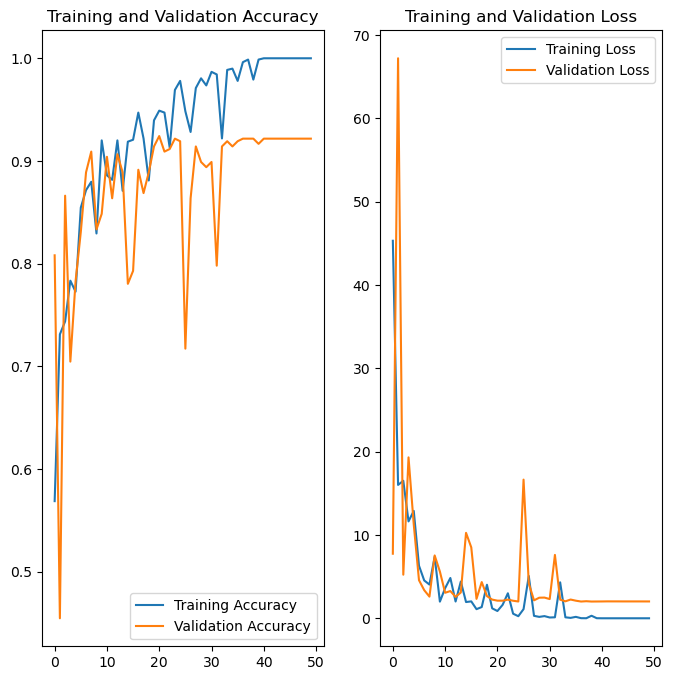

In [69]:
acc = pre_trained.history['accuracy']
val_acc = pre_trained.history['val_accuracy']

loss = pre_trained.history['loss']
val_loss = pre_trained.history['val_loss']

epochs_range = range(init_epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
final_pre_trained_predictions = pre_trained_model.evaluate(
    x = test_batch
)

16/16 [==============================] - 4s 236ms/step - loss: 8.4289 - accuracy: 0.7746


In [72]:
final_pre_trained_predictions[1]

0.7746478915214539